<h1 align=center><font size = 5>Training Exercise 1.1</font></h1>

## Notes:

• This exercise uses the datafile TrainExer11 and requires a computer.  
• The dataset TrainExer11 is available on the website. [Dataset Training Exercise 1.1](https://d396qusza40orc.cloudfront.net/eureconometrics-assets/Dataset%20Files%20for%20On-Demand%20Course/Exercises%20and%20datasets/Module%201/TrainExer11.txt)  
• The slides are aviiable on the link. [Slides Lecture 1.1](https://d396qusza40orc.cloudfront.net/eureconometrics-assets/Dataset%20Files%20for%20On-Demand%20Course/Exercises%20and%20datasets/Handouts%20slides%20videos/Lecture%201.1-4on1.pdf)

## Questions

Dataset TrainExer11 contains survey outcomes of a travel agency that wishes to improve recommendation strategies
for its clients. The dataset contains 26 observations on age and average daily expenditures during holidays.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols


In [2]:
data = pd.read_table('https://d396qusza40orc.cloudfront.net/eureconometrics-assets/Dataset%20Files%20for%20On-Demand%20Course/Exercises%20and%20datasets/Module%201/TrainExer11.txt',index_col=0)
#data = pd.read_excel('TrainExer11.xls',index_col=0)

In [3]:
data.head()

,Age,Expenditures
Observ.,,
1,49,95
2,15,104
3,43,91
4,45,98
5,40,94


In [4]:
data.describe()

,Age,Expenditures
count,26.000000,26.000000
mean,39.346154,101.115385
std,10.639332,6.107876
min,15.000000,89.000000
25%,35.000000,96.000000
50%,39.500000,103.000000
75%,45.750000,106.750000
max,57.000000,109.000000


**(a) Make two histograms, one of expenditures and the other of age. Make also a scatter diagram with expenditures
on the vertical axis versus age on the horizontal axis.**


Text(0, 0.5, 'Frecuencia')

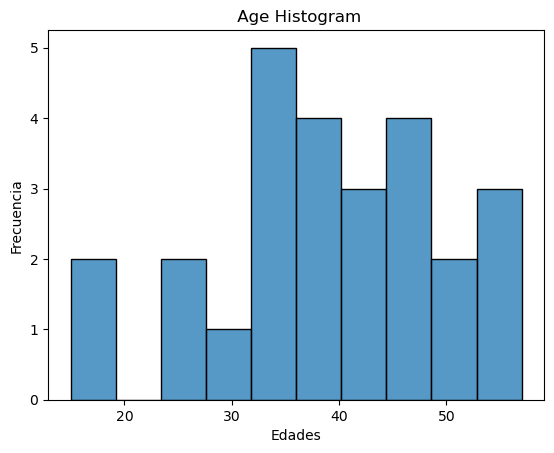

In [5]:
plt.figure()
sns.histplot(data['Age'], bins=10)

plt. title(' Age Histogram')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

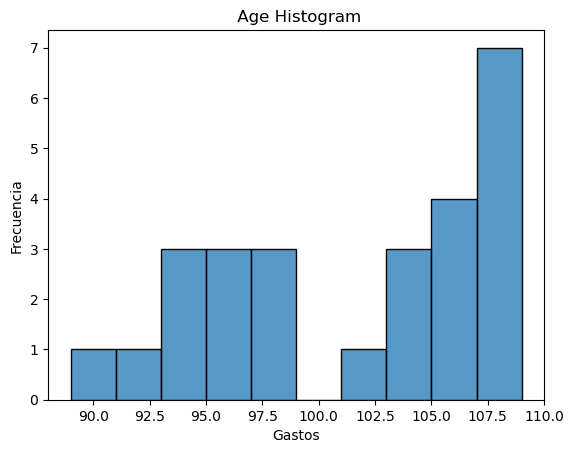

In [6]:
plt.figure()
sns.histplot(data['Expenditures'], bins=10)

plt. title(' Age Histogram')
plt.xlabel('Gastos')
plt.ylabel('Frecuencia')

<AxesSubplot:xlabel='Age', ylabel='Expenditures'>

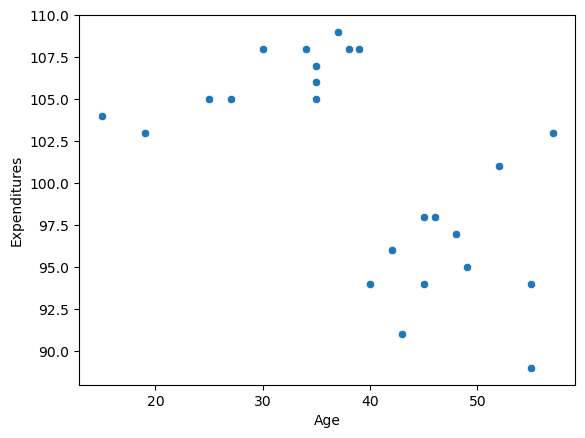

In [7]:
sns.scatterplot(x=data['Age'], y=data['Expenditures'])

There are various ways to visualize the relationship between two variables and to display the regression line that best fits the data  

### Fast Way

<AxesSubplot:xlabel='Age', ylabel='Expenditures'>

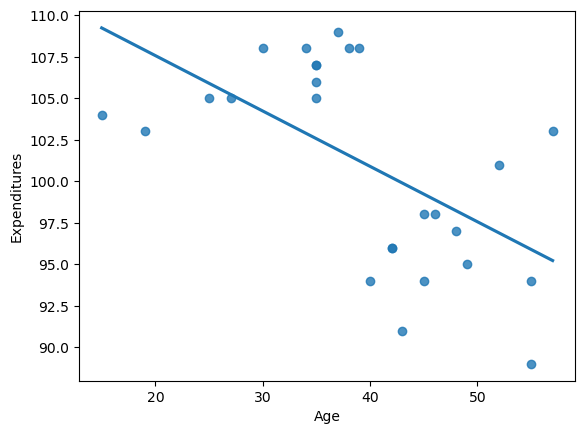

In [8]:
sns.regplot(x=data['Age'], y=data['Expenditures'],ci=None)

### Model Building

In [9]:
ols_data = data[[ 'Expenditures','Age']]

In [10]:
ols_formula = 'Expenditures ~ Age'

In [11]:
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Expenditures   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     12.24
Date:                Fri, 10 Nov 2023   Prob (F-statistic):            0.00185
Time:                        00:11:34   Log-Likelihood:                -78.076
No. Observations:                  26   AIC:                             160.2
Df Residuals:                      24   BIC:                             162.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.2411      3.882     29.428      0.000     106.229     122.253
Age           -0.3336      0.095     -3.498      0.002      -0.530      -0.137
==============================================================================
Omnibus:                        5.126   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                1.689
Skew:                          -0.021   Prob(JB):                        0.430
Kurtosis:                       1.752   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Age', ylabel='Expenditures'>

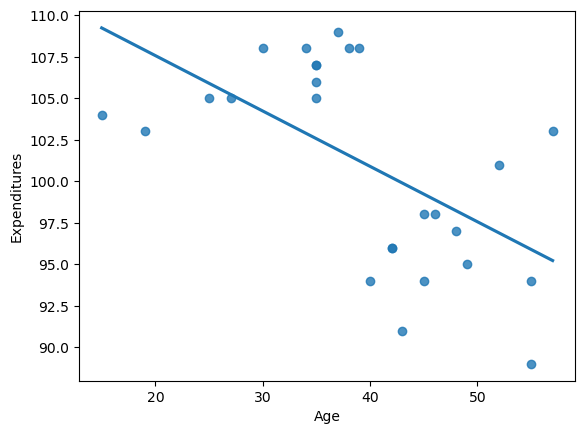

In [13]:
sns.regplot(x='Age', y='Expenditures', data = ols_data,ci=None)

### Using sklearn

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
x = pd.Series.to_numpy(data['Age']).reshape((-1, 1))
y = pd.Series.to_numpy(data['Expenditures'])

In [16]:
model_1 = LinearRegression().fit(x,y)

In [17]:
model_1.score(x,y)

0.3376682003876883

In [18]:
model_1.intercept_

114.24110795493158

In [19]:
model_1.coef_

array([-0.3335961])

Text(0.5, 1.0, 'Expenditures vs. Age')

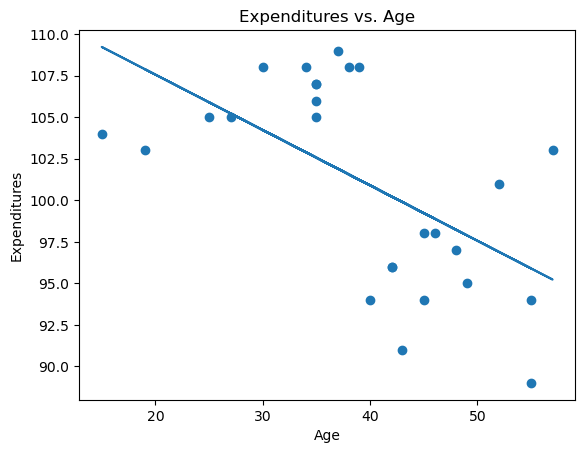

In [20]:
plt.scatter(x,y)
plt.plot(x, model_1.predict(x))
plt.xlabel('Age')
plt.ylabel('Expenditures')
plt.title('Expenditures vs. Age')

**(b) In what respect do the data in this scatter diagram look different from the case of the sales and price data
discussed in the lecture?**

[Slides Lecture 1.1](https://d396qusza40orc.cloudfront.net/eureconometrics-assets/Dataset%20Files%20for%20On-Demand%20Course/Exercises%20and%20datasets/Handouts%20slides%20videos/Lecture%201.1-4on1.pdf)

* Both graphs have a negative slope, although in this case, there is a higher data dispersion.

**(c) Propose a method to analyze these data in a way that assists the travel agent in making recommendations to
future clients.**


* Separate the data on 2 age groups, each of these individual clusters seems to exhibit positive regression slopes, while the 	dataset, which combines the two clusters, displays a negative regression slope.

The scatter diagram indicates two groups of clients. Younger clients spend more than older ones. Further, expenditures tend to increase with age for younger clients, whereas the pattern is less clear for older clients.  


**(d) Compute the sample mean of expenditures of all 26 clients.**


In [21]:
data['Expenditures'].mean()

101.11538461538461

**(e) Compute two sample means of expenditures, one for clients of age forty or more and the other for clients of
age below forty.**


In [22]:
data[data['Age']>=40]['Expenditures'].mean()


95.84615384615384

In [23]:
data[data['Age']<40]['Expenditures'].mean()


106.38461538461539

**(f) What daily expenditures would you predict for a new client of fifty years old? And for someone who is twenty-five
years old?**

From the Model

In [24]:
predicted_expenditure_50 = model.predict({'Age': 50})
predicted_expenditure_25 = model.predict({'Age': 25})

print(f"Para un cliente de 50 años, se predice un gasto diario de: ${predicted_expenditure_50[0]:.2f}")
print(f"Para un cliente de 25 años, se predice un gasto diario de: ${predicted_expenditure_25[0]:.2f}")

Para un cliente de 50 años, se predice un gasto diario de: $97.56
Para un cliente de 25 años, se predice un gasto diario de: $105.90


## Author(s)

<h4> Andres Oliva </h4>